<a href="https://colab.research.google.com/github/achalgarg14/session_6/blob/main/Session_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR,OneCycleLR
from tqdm import tqdm
import torch.nn as nn
import numpy as  np

In [7]:
!pip install torchsummary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install -U albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
cd /content/drive/MyDrive/EVA8/Session_6

/content/drive/.shortcut-targets-by-id/17ah1_eh0p8H_7N2SabIIYctyQc2HwLv6/EVA8/Session_6


In [11]:
import model_class, train_model, test_model, model_training, data
from model_class import Net
from train_model import train
from test_model import test
from model_training import train_test_model
from data import default_dataset, transform_params, transformed_dataset, cifar_10

In [12]:
train_loader, train_set = default_dataset()
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck  ship   dog truck


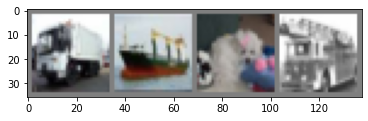

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img /2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
mean = list(np.round(train_set.data.mean(axis=(0,1,2))/255, 4))
mean

[0.4914, 0.4822, 0.4465]

In [15]:
std = list(np.round(train_set.data.std(axis=(0,1,2))/255,4))
std

[0.247, 0.2435, 0.2616]

In [16]:
transform_train, transform_valid = transform_params(mean, std)

In [17]:
train_set, train_loader, test_set, test_loader = transformed_dataset(transform_train,transform_valid)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [18]:
len(train_set), len(test_set)

(50000, 10000)

 ship horse truck   dog


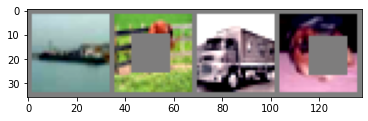

In [19]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
features, labels = next(iter(train_loader))

In [21]:
features.shape, labels.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

### Main Code Block starts

In [22]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)
  device = "cuda"
else:
  device="cpu"


CUDA Available? True


In [23]:
def view_model_summary(dropout,nm='BN'):
  test_model = Net(dropout, nm).to(device)
  print(summary(test_model, input_size=(3, 32, 32)))

In [24]:
view_model_summary(0.1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
         Dropout2d-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 15, 15]          18,464
      BatchNorm2d-10           [-1, 32, 15, 15]              64
             ReLU-11           [-1, 32, 15, 15]               0
        Dropout2d-12           [-1, 32, 15, 15]               0
           Conv2d-13           [-1, 64, 15, 15]          18,432
      BatchNorm2d-14           [-1, 64,

In [26]:
net, train_losses, test_losses, train_acc, test_acc, wrong_predictions = train_test_model(train_loader, test_loader, 'BN', 200, 0.01, 0.002, 0.0001, device)

EPOCH: 0


Loss=1.8100248575210571 Batch_id=390 Accuracy=35.54: 100%|██████████| 391/391 [00:16<00:00, 23.36it/s]


 Average Training Loss=0.015871645803451538, Accuracy=35.542



Test set: Average loss: 1.3749, Accuracy: 4955/10000 (49.55%)

EPOCH: 1


Loss=1.4909917116165161 Batch_id=390 Accuracy=49.66: 100%|██████████| 391/391 [00:17<00:00, 22.52it/s]


 Average Training Loss=0.013171518785953521, Accuracy=49.658



Test set: Average loss: 1.2108, Accuracy: 5695/10000 (56.95%)

EPOCH: 2


Loss=1.5396506786346436 Batch_id=390 Accuracy=56.34: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]



 Average Training Loss=0.012156869573593139, Accuracy=56.342

Test set: Average loss: 1.0545, Accuracy: 6318/10000 (63.18%)

EPOCH: 3


Loss=1.463087558746338 Batch_id=390 Accuracy=59.29: 100%|██████████| 391/391 [00:16<00:00, 24.26it/s]


 Average Training Loss=0.0116809716796875, Accuracy=59.288



Test set: Average loss: 0.9339, Accuracy: 6715/10000 (67.15%)

EPOCH: 4


Loss=1.6953301429748535 Batch_id=390 Accuracy=61.05: 100%|██████████| 391/391 [00:16<00:00, 23.41it/s]


 Average Training Loss=0.011328005175590515, Accuracy=61.054



Test set: Average loss: 0.9388, Accuracy: 6688/10000 (66.88%)

EPOCH: 5


Loss=1.5167644023895264 Batch_id=390 Accuracy=63.26: 100%|██████████| 391/391 [00:16<00:00, 24.25it/s]


 Average Training Loss=0.011038568401336669, Accuracy=63.26



Test set: Average loss: 0.8350, Accuracy: 7070/10000 (70.70%)

EPOCH: 6


Loss=1.3953831195831299 Batch_id=390 Accuracy=64.51: 100%|██████████| 391/391 [00:16<00:00, 24.27it/s]


 Average Training Loss=0.010822873690128326, Accuracy=64.512



Test set: Average loss: 0.8226, Accuracy: 7174/10000 (71.74%)

EPOCH: 7


Loss=1.3220851421356201 Batch_id=390 Accuracy=65.39: 100%|██████████| 391/391 [00:16<00:00, 24.14it/s]


 Average Training Loss=0.010657192487716675, Accuracy=65.394



Test set: Average loss: 0.7976, Accuracy: 7192/10000 (71.92%)

EPOCH: 8


Loss=1.2657947540283203 Batch_id=390 Accuracy=66.25: 100%|██████████| 391/391 [00:16<00:00, 24.01it/s]


 Average Training Loss=0.010449152884483337, Accuracy=66.25



Test set: Average loss: 0.7786, Accuracy: 7311/10000 (73.11%)

EPOCH: 9


Loss=1.4937009811401367 Batch_id=390 Accuracy=66.64: 100%|██████████| 391/391 [00:16<00:00, 23.08it/s]


 Average Training Loss=0.010386404049396515, Accuracy=66.644



Test set: Average loss: 0.7661, Accuracy: 7403/10000 (74.03%)

EPOCH: 10


Loss=1.2644718885421753 Batch_id=390 Accuracy=67.34: 100%|██████████| 391/391 [00:16<00:00, 23.92it/s]


 Average Training Loss=0.010257716369628906, Accuracy=67.338



Test set: Average loss: 0.7555, Accuracy: 7413/10000 (74.13%)

EPOCH: 11


Loss=1.200996994972229 Batch_id=390 Accuracy=67.97: 100%|██████████| 391/391 [00:16<00:00, 24.34it/s]


 Average Training Loss=0.010119391644001007, Accuracy=67.97



Test set: Average loss: 0.7611, Accuracy: 7371/10000 (73.71%)

EPOCH: 12


Loss=1.3728227615356445 Batch_id=390 Accuracy=68.36: 100%|██████████| 391/391 [00:16<00:00, 24.40it/s]


 Average Training Loss=0.010055677740573882, Accuracy=68.358



Test set: Average loss: 0.7123, Accuracy: 7600/10000 (76.00%)

EPOCH: 13


Loss=1.140021800994873 Batch_id=390 Accuracy=68.71: 100%|██████████| 391/391 [00:16<00:00, 23.67it/s]


 Average Training Loss=0.009997202314138412, Accuracy=68.706



Test set: Average loss: 0.6732, Accuracy: 7710/10000 (77.10%)

EPOCH: 14


Loss=1.2077796459197998 Batch_id=390 Accuracy=68.99: 100%|██████████| 391/391 [00:16<00:00, 24.36it/s]


 Average Training Loss=0.009914623255729674, Accuracy=68.986



Test set: Average loss: 0.6631, Accuracy: 7741/10000 (77.41%)

EPOCH: 15


Loss=1.2081964015960693 Batch_id=390 Accuracy=69.27: 100%|██████████| 391/391 [00:16<00:00, 24.40it/s]



 Average Training Loss=0.009877953383922576, Accuracy=69.266

Test set: Average loss: 0.6850, Accuracy: 7659/10000 (76.59%)

EPOCH: 16


Loss=1.3147395849227905 Batch_id=390 Accuracy=69.46: 100%|██████████| 391/391 [00:15<00:00, 24.62it/s]


 Average Training Loss=0.009774574472904205, Accuracy=69.462



Test set: Average loss: 0.6564, Accuracy: 7743/10000 (77.43%)

EPOCH: 17


Loss=1.489556908607483 Batch_id=390 Accuracy=69.63: 100%|██████████| 391/391 [00:16<00:00, 23.42it/s]


 Average Training Loss=0.009736227213144303, Accuracy=69.634



Test set: Average loss: 0.6457, Accuracy: 7769/10000 (77.69%)

EPOCH: 18


Loss=1.2189677953720093 Batch_id=390 Accuracy=69.89: 100%|██████████| 391/391 [00:17<00:00, 22.88it/s]


 Average Training Loss=0.009684398746490479, Accuracy=69.886



Test set: Average loss: 0.6802, Accuracy: 7645/10000 (76.45%)

EPOCH: 19


Loss=1.2522474527359009 Batch_id=390 Accuracy=70.18: 100%|██████████| 391/391 [00:16<00:00, 24.42it/s]



 Average Training Loss=0.00967810605764389, Accuracy=70.176

Test set: Average loss: 0.7014, Accuracy: 7602/10000 (76.02%)

EPOCH: 20


Loss=1.2927659749984741 Batch_id=390 Accuracy=70.50: 100%|██████████| 391/391 [00:16<00:00, 24.38it/s]


 Average Training Loss=0.009602619459629059, Accuracy=70.502



Test set: Average loss: 0.6515, Accuracy: 7800/10000 (78.00%)

EPOCH: 21


Loss=1.1293755769729614 Batch_id=390 Accuracy=70.96: 100%|██████████| 391/391 [00:15<00:00, 24.45it/s]


 Average Training Loss=0.00946483875632286, Accuracy=70.962



Test set: Average loss: 0.6388, Accuracy: 7848/10000 (78.48%)

EPOCH: 22


Loss=1.337485909461975 Batch_id=390 Accuracy=70.85: 100%|██████████| 391/391 [00:16<00:00, 23.95it/s]



 Average Training Loss=0.009512792150974274, Accuracy=70.848

Test set: Average loss: 0.6410, Accuracy: 7841/10000 (78.41%)

EPOCH: 23


Loss=1.1040304899215698 Batch_id=390 Accuracy=71.05: 100%|██████████| 391/391 [00:16<00:00, 23.72it/s]


 Average Training Loss=0.00949910866498947, Accuracy=71.054



Test set: Average loss: 0.6649, Accuracy: 7735/10000 (77.35%)

EPOCH: 24


Loss=1.1708261966705322 Batch_id=390 Accuracy=70.79: 100%|██████████| 391/391 [00:16<00:00, 24.24it/s]


 Average Training Loss=0.009473866139650344, Accuracy=70.79



Test set: Average loss: 0.6542, Accuracy: 7739/10000 (77.39%)

EPOCH: 25


Loss=1.1667568683624268 Batch_id=390 Accuracy=71.03: 100%|██████████| 391/391 [00:16<00:00, 24.23it/s]


 Average Training Loss=0.009473981902599335, Accuracy=71.034



Test set: Average loss: 0.6314, Accuracy: 7854/10000 (78.54%)

EPOCH: 26


Loss=0.990392804145813 Batch_id=390 Accuracy=71.42: 100%|██████████| 391/391 [00:16<00:00, 24.34it/s]


 Average Training Loss=0.009372977229356766, Accuracy=71.422



Test set: Average loss: 0.6427, Accuracy: 7859/10000 (78.59%)

EPOCH: 27


Loss=1.2036586999893188 Batch_id=390 Accuracy=71.22: 100%|██████████| 391/391 [00:16<00:00, 23.43it/s]


 Average Training Loss=0.009452904022932052, Accuracy=71.222



Test set: Average loss: 0.6389, Accuracy: 7842/10000 (78.42%)

EPOCH: 28


Loss=1.1993091106414795 Batch_id=390 Accuracy=71.55: 100%|██████████| 391/391 [00:16<00:00, 24.28it/s]


 Average Training Loss=0.009385355267524719, Accuracy=71.548



Test set: Average loss: 0.6042, Accuracy: 7972/10000 (79.72%)

EPOCH: 29


Loss=1.4557604789733887 Batch_id=390 Accuracy=71.52: 100%|██████████| 391/391 [00:16<00:00, 24.05it/s]


 Average Training Loss=0.00934951903820038, Accuracy=71.516



Test set: Average loss: 0.6246, Accuracy: 7875/10000 (78.75%)

EPOCH: 30


Loss=1.0880813598632812 Batch_id=390 Accuracy=71.70: 100%|██████████| 391/391 [00:15<00:00, 24.44it/s]


 Average Training Loss=0.009322831597328185, Accuracy=71.696



Test set: Average loss: 0.6281, Accuracy: 7877/10000 (78.77%)

EPOCH: 31


Loss=1.3840044736862183 Batch_id=390 Accuracy=71.95: 100%|██████████| 391/391 [00:16<00:00, 24.32it/s]


 Average Training Loss=0.009327243753671647, Accuracy=71.952



Test set: Average loss: 0.6212, Accuracy: 7884/10000 (78.84%)

EPOCH: 32


Loss=1.1761313676834106 Batch_id=390 Accuracy=71.81: 100%|██████████| 391/391 [00:16<00:00, 23.43it/s]


 Average Training Loss=0.009314447448253632, Accuracy=71.81



Test set: Average loss: 0.6035, Accuracy: 7966/10000 (79.66%)

EPOCH: 33


Loss=1.1931042671203613 Batch_id=390 Accuracy=72.21: 100%|██████████| 391/391 [00:17<00:00, 22.55it/s]


 Average Training Loss=0.009253552780151367, Accuracy=72.212



Test set: Average loss: 0.5918, Accuracy: 8000/10000 (80.00%)

EPOCH: 34


Loss=1.1529505252838135 Batch_id=390 Accuracy=72.05: 100%|██████████| 391/391 [00:16<00:00, 24.43it/s]


 Average Training Loss=0.009285928202867508, Accuracy=72.046



Test set: Average loss: 0.6180, Accuracy: 7872/10000 (78.72%)

EPOCH: 35


Loss=1.1004490852355957 Batch_id=390 Accuracy=72.27: 100%|██████████| 391/391 [00:16<00:00, 24.29it/s]


 Average Training Loss=0.009248281301259995, Accuracy=72.274



Test set: Average loss: 0.6457, Accuracy: 7815/10000 (78.15%)

EPOCH: 36


Loss=1.0639281272888184 Batch_id=390 Accuracy=72.25: 100%|██████████| 391/391 [00:16<00:00, 23.18it/s]


 Average Training Loss=0.0092372878241539, Accuracy=72.252



Test set: Average loss: 0.6180, Accuracy: 7894/10000 (78.94%)

EPOCH: 37


Loss=1.4667699337005615 Batch_id=390 Accuracy=72.49: 100%|██████████| 391/391 [00:16<00:00, 24.13it/s]


 Average Training Loss=0.00918377383708954, Accuracy=72.488



Test set: Average loss: 0.6070, Accuracy: 7939/10000 (79.39%)

EPOCH: 38


Loss=1.1691594123840332 Batch_id=390 Accuracy=72.21: 100%|██████████| 391/391 [00:16<00:00, 24.12it/s]


 Average Training Loss=0.009229041292667389, Accuracy=72.212



Test set: Average loss: 0.6140, Accuracy: 7912/10000 (79.12%)

EPOCH: 39


Loss=1.4275575876235962 Batch_id=390 Accuracy=72.52: 100%|██████████| 391/391 [00:16<00:00, 24.36it/s]


 Average Training Loss=0.009170568534135818, Accuracy=72.52



Test set: Average loss: 0.6245, Accuracy: 7903/10000 (79.03%)

EPOCH: 40


Loss=1.0445572137832642 Batch_id=390 Accuracy=75.26: 100%|██████████| 391/391 [00:16<00:00, 23.81it/s]


 Average Training Loss=0.008556741758584976, Accuracy=75.264



Test set: Average loss: 0.5144, Accuracy: 8265/10000 (82.65%)

EPOCH: 41


Loss=1.1180758476257324 Batch_id=390 Accuracy=76.07: 100%|██████████| 391/391 [00:16<00:00, 23.42it/s]


 Average Training Loss=0.008253388887643815, Accuracy=76.072



Test set: Average loss: 0.5056, Accuracy: 8283/10000 (82.83%)

EPOCH: 42


Loss=1.150144338607788 Batch_id=390 Accuracy=76.67: 100%|██████████| 391/391 [00:16<00:00, 23.86it/s]


 Average Training Loss=0.008086401802301408, Accuracy=76.668



Test set: Average loss: 0.4967, Accuracy: 8300/10000 (83.00%)

EPOCH: 43


Loss=0.8690747022628784 Batch_id=390 Accuracy=76.90: 100%|██████████| 391/391 [00:16<00:00, 24.01it/s]


 Average Training Loss=0.007968098230361938, Accuracy=76.898



Test set: Average loss: 0.4931, Accuracy: 8323/10000 (83.23%)

EPOCH: 44


Loss=0.9214755892753601 Batch_id=390 Accuracy=77.06: 100%|██████████| 391/391 [00:16<00:00, 24.05it/s]


 Average Training Loss=0.007857315775156021, Accuracy=77.062



Test set: Average loss: 0.4928, Accuracy: 8330/10000 (83.30%)

EPOCH: 45


Loss=1.074986219406128 Batch_id=390 Accuracy=77.61: 100%|██████████| 391/391 [00:17<00:00, 22.84it/s]


 Average Training Loss=0.007721203521490097, Accuracy=77.614



Test set: Average loss: 0.4930, Accuracy: 8328/10000 (83.28%)

EPOCH: 46


Loss=0.965872585773468 Batch_id=390 Accuracy=77.24: 100%|██████████| 391/391 [00:16<00:00, 23.73it/s]



 Average Training Loss=0.007747365993261337, Accuracy=77.242

Test set: Average loss: 0.4928, Accuracy: 8347/10000 (83.47%)

EPOCH: 47


Loss=0.936637282371521 Batch_id=390 Accuracy=77.27: 100%|██████████| 391/391 [00:16<00:00, 24.11it/s]


 Average Training Loss=0.007703890120983123, Accuracy=77.27



Test set: Average loss: 0.4884, Accuracy: 8361/10000 (83.61%)

EPOCH: 48


Loss=1.157999873161316 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:16<00:00, 24.16it/s]



 Average Training Loss=0.007641382546424866, Accuracy=77.486

Test set: Average loss: 0.4840, Accuracy: 8354/10000 (83.54%)

EPOCH: 49


Loss=0.8497554659843445 Batch_id=390 Accuracy=77.58: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]


 Average Training Loss=0.007637950694561004, Accuracy=77.584



Test set: Average loss: 0.4833, Accuracy: 8387/10000 (83.87%)

EPOCH: 50


Loss=1.0721161365509033 Batch_id=390 Accuracy=77.76: 100%|██████████| 391/391 [00:16<00:00, 24.42it/s]


 Average Training Loss=0.007558102765083313, Accuracy=77.764



Test set: Average loss: 0.4824, Accuracy: 8371/10000 (83.71%)

EPOCH: 51


Loss=1.152252435684204 Batch_id=390 Accuracy=77.78: 100%|██████████| 391/391 [00:16<00:00, 23.78it/s]


 Average Training Loss=0.0075048539686203, Accuracy=77.776



Test set: Average loss: 0.4837, Accuracy: 8367/10000 (83.67%)

EPOCH: 52


Loss=0.8135130405426025 Batch_id=390 Accuracy=77.62: 100%|██████████| 391/391 [00:16<00:00, 24.05it/s]



 Average Training Loss=0.0075274201726913455, Accuracy=77.62

Test set: Average loss: 0.4792, Accuracy: 8373/10000 (83.73%)

EPOCH: 53


Loss=0.9497820138931274 Batch_id=390 Accuracy=77.70: 100%|██████████| 391/391 [00:16<00:00, 23.91it/s]


 Average Training Loss=0.007489331785440445, Accuracy=77.696



Test set: Average loss: 0.4830, Accuracy: 8354/10000 (83.54%)

EPOCH: 54


Loss=1.2332453727722168 Batch_id=390 Accuracy=78.05: 100%|██████████| 391/391 [00:16<00:00, 23.53it/s]


 Average Training Loss=0.007401499501466751, Accuracy=78.05



Test set: Average loss: 0.4819, Accuracy: 8367/10000 (83.67%)

EPOCH: 55


Loss=1.0100061893463135 Batch_id=390 Accuracy=77.96: 100%|██████████| 391/391 [00:16<00:00, 24.32it/s]


 Average Training Loss=0.007423431262969971, Accuracy=77.96



Test set: Average loss: 0.4830, Accuracy: 8365/10000 (83.65%)

EPOCH: 56


Loss=1.2830950021743774 Batch_id=390 Accuracy=77.80: 100%|██████████| 391/391 [00:16<00:00, 23.89it/s]


 Average Training Loss=0.007397586944103241, Accuracy=77.804



Test set: Average loss: 0.4832, Accuracy: 8358/10000 (83.58%)

EPOCH: 57


Loss=0.9211888313293457 Batch_id=390 Accuracy=78.16: 100%|██████████| 391/391 [00:16<00:00, 24.24it/s]


 Average Training Loss=0.007348914279937744, Accuracy=78.158



Test set: Average loss: 0.4794, Accuracy: 8373/10000 (83.73%)

EPOCH: 58


Loss=1.0496147871017456 Batch_id=390 Accuracy=78.15: 100%|██████████| 391/391 [00:16<00:00, 23.10it/s]


 Average Training Loss=0.00730730378985405, Accuracy=78.152



Test set: Average loss: 0.4773, Accuracy: 8395/10000 (83.95%)

EPOCH: 59


Loss=1.1524170637130737 Batch_id=390 Accuracy=78.19: 100%|██████████| 391/391 [00:16<00:00, 24.18it/s]



 Average Training Loss=0.007265646508932114, Accuracy=78.19

Test set: Average loss: 0.4798, Accuracy: 8369/10000 (83.69%)

EPOCH: 60


Loss=1.1543036699295044 Batch_id=390 Accuracy=78.31: 100%|██████████| 391/391 [00:16<00:00, 24.29it/s]


 Average Training Loss=0.007266390413045883, Accuracy=78.308



Test set: Average loss: 0.4803, Accuracy: 8373/10000 (83.73%)

EPOCH: 61


Loss=0.9946707487106323 Batch_id=390 Accuracy=78.33: 100%|██████████| 391/391 [00:16<00:00, 24.07it/s]


 Average Training Loss=0.007230745447874069, Accuracy=78.334



Test set: Average loss: 0.4780, Accuracy: 8423/10000 (84.23%)

EPOCH: 62


Loss=0.9894049167633057 Batch_id=390 Accuracy=78.30: 100%|██████████| 391/391 [00:16<00:00, 24.33it/s]


 Average Training Loss=0.0072213616871833804, Accuracy=78.304



Test set: Average loss: 0.4771, Accuracy: 8386/10000 (83.86%)

EPOCH: 63


Loss=0.9379560351371765 Batch_id=390 Accuracy=78.55: 100%|██████████| 391/391 [00:16<00:00, 23.07it/s]


 Average Training Loss=0.007138698251247406, Accuracy=78.55



Test set: Average loss: 0.4746, Accuracy: 8416/10000 (84.16%)

EPOCH: 64


Loss=0.8531699180603027 Batch_id=390 Accuracy=78.21: 100%|██████████| 391/391 [00:17<00:00, 21.96it/s]


 Average Training Loss=0.007183500981330871, Accuracy=78.214



Test set: Average loss: 0.4735, Accuracy: 8407/10000 (84.07%)

EPOCH: 65


Loss=1.002650499343872 Batch_id=390 Accuracy=78.28: 100%|██████████| 391/391 [00:16<00:00, 23.94it/s]


 Average Training Loss=0.00718288994550705, Accuracy=78.284



Test set: Average loss: 0.4724, Accuracy: 8415/10000 (84.15%)

EPOCH: 66


Loss=0.9414713382720947 Batch_id=390 Accuracy=78.50: 100%|██████████| 391/391 [00:16<00:00, 23.54it/s]


 Average Training Loss=0.007147204550504684, Accuracy=78.496



Test set: Average loss: 0.4766, Accuracy: 8412/10000 (84.12%)

EPOCH: 67


Loss=0.8867943286895752 Batch_id=390 Accuracy=78.29: 100%|██████████| 391/391 [00:16<00:00, 23.42it/s]


 Average Training Loss=0.007167821743488312, Accuracy=78.29



Test set: Average loss: 0.4701, Accuracy: 8434/10000 (84.34%)

EPOCH: 68


Loss=0.9303873181343079 Batch_id=390 Accuracy=78.46: 100%|██████████| 391/391 [00:17<00:00, 22.96it/s]


 Average Training Loss=0.007123951374292374, Accuracy=78.456



Test set: Average loss: 0.4708, Accuracy: 8409/10000 (84.09%)

EPOCH: 69


Loss=0.8068909645080566 Batch_id=390 Accuracy=78.26: 100%|██████████| 391/391 [00:16<00:00, 23.63it/s]


 Average Training Loss=0.007128842488527298, Accuracy=78.262



Test set: Average loss: 0.4713, Accuracy: 8419/10000 (84.19%)

EPOCH: 70


Loss=0.9058403968811035 Batch_id=390 Accuracy=78.35: 100%|██████████| 391/391 [00:16<00:00, 23.72it/s]


 Average Training Loss=0.007113648881912232, Accuracy=78.348



Test set: Average loss: 0.4777, Accuracy: 8383/10000 (83.83%)

EPOCH: 71


Loss=0.7986933588981628 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [00:16<00:00, 23.95it/s]


 Average Training Loss=0.00705628830909729, Accuracy=78.56



Test set: Average loss: 0.4726, Accuracy: 8385/10000 (83.85%)

EPOCH: 72


Loss=0.8755314350128174 Batch_id=390 Accuracy=78.57: 100%|██████████| 391/391 [00:16<00:00, 23.18it/s]


 Average Training Loss=0.007066540172100067, Accuracy=78.57



Test set: Average loss: 0.4718, Accuracy: 8401/10000 (84.01%)

EPOCH: 73


Loss=0.861499547958374 Batch_id=390 Accuracy=78.63: 100%|██████████| 391/391 [00:16<00:00, 23.76it/s]


 Average Training Loss=0.0070526437819004055, Accuracy=78.63



Test set: Average loss: 0.4708, Accuracy: 8411/10000 (84.11%)

EPOCH: 74


Loss=0.8226120471954346 Batch_id=390 Accuracy=78.67: 100%|██████████| 391/391 [00:16<00:00, 23.86it/s]


 Average Training Loss=0.007017023727893829, Accuracy=78.668



Test set: Average loss: 0.4681, Accuracy: 8414/10000 (84.14%)

EPOCH: 75


Loss=0.9114948511123657 Batch_id=390 Accuracy=78.84: 100%|██████████| 391/391 [00:16<00:00, 23.43it/s]



 Average Training Loss=0.0069521546983718875, Accuracy=78.836

Test set: Average loss: 0.4726, Accuracy: 8398/10000 (83.98%)

EPOCH: 76


Loss=0.9612948894500732 Batch_id=390 Accuracy=78.97: 100%|██████████| 391/391 [00:16<00:00, 23.18it/s]


 Average Training Loss=0.006938225349187851, Accuracy=78.966



Test set: Average loss: 0.4694, Accuracy: 8434/10000 (84.34%)

EPOCH: 77


Loss=0.808419406414032 Batch_id=390 Accuracy=78.94: 100%|██████████| 391/391 [00:16<00:00, 23.86it/s]


 Average Training Loss=0.00694871866941452, Accuracy=78.944



Test set: Average loss: 0.4732, Accuracy: 8402/10000 (84.02%)

EPOCH: 78


Loss=0.7994824051856995 Batch_id=390 Accuracy=78.82: 100%|██████████| 391/391 [00:16<00:00, 23.50it/s]


 Average Training Loss=0.006930334340333939, Accuracy=78.818



Test set: Average loss: 0.4714, Accuracy: 8439/10000 (84.39%)

EPOCH: 79


Loss=0.9200584888458252 Batch_id=390 Accuracy=78.95: 100%|██████████| 391/391 [00:18<00:00, 21.68it/s]


 Average Training Loss=0.006948505187034607, Accuracy=78.952



Test set: Average loss: 0.4686, Accuracy: 8423/10000 (84.23%)

EPOCH: 80


Loss=0.8205202221870422 Batch_id=390 Accuracy=79.10: 100%|██████████| 391/391 [00:16<00:00, 23.79it/s]


 Average Training Loss=0.006853111953735351, Accuracy=79.096



Test set: Average loss: 0.4600, Accuracy: 8439/10000 (84.39%)

EPOCH: 81


Loss=0.8861594200134277 Batch_id=390 Accuracy=79.46: 100%|██████████| 391/391 [00:16<00:00, 23.01it/s]


 Average Training Loss=0.006799886685609818, Accuracy=79.456



Test set: Average loss: 0.4576, Accuracy: 8449/10000 (84.49%)

EPOCH: 82


Loss=0.866545557975769 Batch_id=390 Accuracy=79.36: 100%|██████████| 391/391 [00:16<00:00, 24.11it/s]


 Average Training Loss=0.006812600048780441, Accuracy=79.356



Test set: Average loss: 0.4621, Accuracy: 8431/10000 (84.31%)

EPOCH: 83


Loss=0.7490679025650024 Batch_id=390 Accuracy=79.55: 100%|██████████| 391/391 [00:16<00:00, 23.89it/s]


 Average Training Loss=0.006781294354200363, Accuracy=79.548



Test set: Average loss: 0.4569, Accuracy: 8455/10000 (84.55%)

EPOCH: 84


Loss=1.17779541015625 Batch_id=390 Accuracy=79.25: 100%|██████████| 391/391 [00:16<00:00, 24.13it/s]


 Average Training Loss=0.006798025289773941, Accuracy=79.25



Test set: Average loss: 0.4599, Accuracy: 8443/10000 (84.43%)

EPOCH: 85


Loss=0.8153195977210999 Batch_id=390 Accuracy=79.46: 100%|██████████| 391/391 [00:16<00:00, 23.43it/s]


 Average Training Loss=0.00677860534787178, Accuracy=79.456



Test set: Average loss: 0.4595, Accuracy: 8438/10000 (84.38%)

EPOCH: 86


Loss=0.8200198411941528 Batch_id=390 Accuracy=79.65: 100%|██████████| 391/391 [00:16<00:00, 23.40it/s]


 Average Training Loss=0.006723842084407806, Accuracy=79.654



Test set: Average loss: 0.4545, Accuracy: 8464/10000 (84.64%)

EPOCH: 87


Loss=1.134480357170105 Batch_id=390 Accuracy=79.43: 100%|██████████| 391/391 [00:16<00:00, 23.88it/s]


 Average Training Loss=0.006749540176391602, Accuracy=79.43



Test set: Average loss: 0.4590, Accuracy: 8433/10000 (84.33%)

EPOCH: 88


Loss=0.9935846328735352 Batch_id=390 Accuracy=79.48: 100%|██████████| 391/391 [00:16<00:00, 23.65it/s]


 Average Training Loss=0.006758749655485153, Accuracy=79.48



Test set: Average loss: 0.4558, Accuracy: 8461/10000 (84.61%)

EPOCH: 89


Loss=0.6574864387512207 Batch_id=390 Accuracy=79.47: 100%|██████████| 391/391 [00:16<00:00, 23.63it/s]


 Average Training Loss=0.006753388457298279, Accuracy=79.472



Test set: Average loss: 0.4562, Accuracy: 8443/10000 (84.43%)

EPOCH: 90


Loss=0.8567181825637817 Batch_id=390 Accuracy=79.67: 100%|██████████| 391/391 [00:16<00:00, 23.09it/s]


 Average Training Loss=0.006711106164455414, Accuracy=79.67



Test set: Average loss: 0.4556, Accuracy: 8457/10000 (84.57%)

EPOCH: 91


Loss=0.8720968961715698 Batch_id=390 Accuracy=79.53: 100%|██████████| 391/391 [00:16<00:00, 23.98it/s]


 Average Training Loss=0.006744503918886185, Accuracy=79.534



Test set: Average loss: 0.4568, Accuracy: 8458/10000 (84.58%)

EPOCH: 92


Loss=0.9042276740074158 Batch_id=390 Accuracy=79.65: 100%|██████████| 391/391 [00:16<00:00, 23.39it/s]


 Average Training Loss=0.0067028211271762846, Accuracy=79.648



Test set: Average loss: 0.4569, Accuracy: 8455/10000 (84.55%)

EPOCH: 93


Loss=1.059880256652832 Batch_id=390 Accuracy=79.46: 100%|██████████| 391/391 [00:17<00:00, 22.27it/s]


 Average Training Loss=0.006728588538169861, Accuracy=79.46



Test set: Average loss: 0.4559, Accuracy: 8456/10000 (84.56%)

EPOCH: 94


Loss=0.7450201511383057 Batch_id=390 Accuracy=79.63: 100%|██████████| 391/391 [00:17<00:00, 22.82it/s]


 Average Training Loss=0.0066928335392475126, Accuracy=79.634



Test set: Average loss: 0.4560, Accuracy: 8466/10000 (84.66%)

EPOCH: 95


Loss=0.8723504543304443 Batch_id=390 Accuracy=79.62: 100%|██████████| 391/391 [00:16<00:00, 23.50it/s]


 Average Training Loss=0.006695298622846603, Accuracy=79.624



Test set: Average loss: 0.4562, Accuracy: 8448/10000 (84.48%)

EPOCH: 96


Loss=1.1089417934417725 Batch_id=390 Accuracy=79.71: 100%|██████████| 391/391 [00:16<00:00, 23.62it/s]


 Average Training Loss=0.0067064232623577115, Accuracy=79.712



Test set: Average loss: 0.4593, Accuracy: 8439/10000 (84.39%)

EPOCH: 97


Loss=0.7610126733779907 Batch_id=390 Accuracy=79.73: 100%|██████████| 391/391 [00:16<00:00, 23.73it/s]


 Average Training Loss=0.006681669211387634, Accuracy=79.73



Test set: Average loss: 0.4576, Accuracy: 8455/10000 (84.55%)

EPOCH: 98


Loss=0.948754072189331 Batch_id=390 Accuracy=79.62: 100%|██████████| 391/391 [00:16<00:00, 23.19it/s]


 Average Training Loss=0.006684149260520935, Accuracy=79.618



Test set: Average loss: 0.4544, Accuracy: 8457/10000 (84.57%)

EPOCH: 99


Loss=0.7615824341773987 Batch_id=390 Accuracy=80.18: 100%|██████████| 391/391 [00:16<00:00, 23.54it/s]


 Average Training Loss=0.006601318836212158, Accuracy=80.182



Test set: Average loss: 0.4564, Accuracy: 8462/10000 (84.62%)

EPOCH: 100


Loss=0.7821371555328369 Batch_id=390 Accuracy=79.75: 100%|██████████| 391/391 [00:16<00:00, 23.51it/s]


 Average Training Loss=0.006657482566833496, Accuracy=79.754



Test set: Average loss: 0.4540, Accuracy: 8450/10000 (84.50%)

EPOCH: 101


Loss=0.844374418258667 Batch_id=390 Accuracy=79.56: 100%|██████████| 391/391 [00:16<00:00, 23.77it/s]


 Average Training Loss=0.0066752867794036864, Accuracy=79.56



Test set: Average loss: 0.4563, Accuracy: 8455/10000 (84.55%)

EPOCH: 102


Loss=0.6949011087417603 Batch_id=390 Accuracy=79.54: 100%|██████████| 391/391 [00:16<00:00, 23.50it/s]



 Average Training Loss=0.006657952237129211, Accuracy=79.536

Test set: Average loss: 0.4550, Accuracy: 8463/10000 (84.63%)

EPOCH: 103


Loss=0.912074863910675 Batch_id=390 Accuracy=79.78: 100%|██████████| 391/391 [00:16<00:00, 23.02it/s]


 Average Training Loss=0.00666524565577507, Accuracy=79.782



Test set: Average loss: 0.4555, Accuracy: 8462/10000 (84.62%)

EPOCH: 104


Loss=0.6772691011428833 Batch_id=390 Accuracy=79.68: 100%|██████████| 391/391 [00:16<00:00, 23.87it/s]


 Average Training Loss=0.006680529288053513, Accuracy=79.682



Test set: Average loss: 0.4570, Accuracy: 8461/10000 (84.61%)

EPOCH: 105


Loss=0.7866981625556946 Batch_id=390 Accuracy=79.78: 100%|██████████| 391/391 [00:16<00:00, 23.31it/s]


 Average Training Loss=0.006616917247772217, Accuracy=79.782



Test set: Average loss: 0.4564, Accuracy: 8465/10000 (84.65%)

EPOCH: 106


Loss=0.7965673208236694 Batch_id=390 Accuracy=79.71: 100%|██████████| 391/391 [00:16<00:00, 23.43it/s]


 Average Training Loss=0.006716218345165253, Accuracy=79.708



Test set: Average loss: 0.4545, Accuracy: 8439/10000 (84.39%)

EPOCH: 107


Loss=0.9032160043716431 Batch_id=390 Accuracy=79.69: 100%|██████████| 391/391 [00:16<00:00, 23.02it/s]


 Average Training Loss=0.006658002210855484, Accuracy=79.69



Test set: Average loss: 0.4540, Accuracy: 8460/10000 (84.60%)

EPOCH: 108


Loss=0.9164664149284363 Batch_id=390 Accuracy=79.90: 100%|██████████| 391/391 [00:18<00:00, 21.69it/s]


 Average Training Loss=0.00662690463423729, Accuracy=79.902



Test set: Average loss: 0.4557, Accuracy: 8442/10000 (84.42%)

EPOCH: 109


Loss=0.8100214004516602 Batch_id=390 Accuracy=79.56: 100%|██████████| 391/391 [00:16<00:00, 23.31it/s]


 Average Training Loss=0.006680277342796325, Accuracy=79.558



Test set: Average loss: 0.4562, Accuracy: 8440/10000 (84.40%)

EPOCH: 110


Loss=0.8713226318359375 Batch_id=390 Accuracy=79.82: 100%|██████████| 391/391 [00:16<00:00, 23.10it/s]



 Average Training Loss=0.006630722397565842, Accuracy=79.822

Test set: Average loss: 0.4558, Accuracy: 8453/10000 (84.53%)

EPOCH: 111


Loss=0.9869195222854614 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:17<00:00, 22.39it/s]


 Average Training Loss=0.006671193194389343, Accuracy=79.8



Test set: Average loss: 0.4572, Accuracy: 8458/10000 (84.58%)

EPOCH: 112


Loss=0.8682301044464111 Batch_id=390 Accuracy=79.79: 100%|██████████| 391/391 [00:17<00:00, 22.89it/s]


 Average Training Loss=0.006667329860925674, Accuracy=79.794



Test set: Average loss: 0.4559, Accuracy: 8462/10000 (84.62%)

EPOCH: 113


Loss=0.9267656803131104 Batch_id=390 Accuracy=79.35: 100%|██████████| 391/391 [00:17<00:00, 22.95it/s]


 Average Training Loss=0.006696149671077728, Accuracy=79.346



Test set: Average loss: 0.4581, Accuracy: 8453/10000 (84.53%)

EPOCH: 114


Loss=0.8301843404769897 Batch_id=390 Accuracy=79.79: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]


 Average Training Loss=0.006661613872051239, Accuracy=79.792



Test set: Average loss: 0.4543, Accuracy: 8459/10000 (84.59%)

EPOCH: 115


Loss=0.8785613179206848 Batch_id=390 Accuracy=79.71: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]


 Average Training Loss=0.006662727403640747, Accuracy=79.71



Test set: Average loss: 0.4554, Accuracy: 8449/10000 (84.49%)

EPOCH: 116


Loss=0.9508669972419739 Batch_id=390 Accuracy=79.40: 100%|██████████| 391/391 [00:16<00:00, 23.26it/s]


 Average Training Loss=0.006680404238700866, Accuracy=79.396



Test set: Average loss: 0.4577, Accuracy: 8461/10000 (84.61%)

EPOCH: 117


Loss=0.9247657656669617 Batch_id=390 Accuracy=79.75: 100%|██████████| 391/391 [00:16<00:00, 23.01it/s]


 Average Training Loss=0.006654408445358276, Accuracy=79.748



Test set: Average loss: 0.4554, Accuracy: 8459/10000 (84.59%)

EPOCH: 118


Loss=0.9000234007835388 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:17<00:00, 22.84it/s]


 Average Training Loss=0.006657904205322265, Accuracy=79.798



Test set: Average loss: 0.4547, Accuracy: 8466/10000 (84.66%)

EPOCH: 119


Loss=0.8699271082878113 Batch_id=390 Accuracy=79.97: 100%|██████████| 391/391 [00:17<00:00, 22.11it/s]


 Average Training Loss=0.006620040290355682, Accuracy=79.972



Test set: Average loss: 0.4554, Accuracy: 8461/10000 (84.61%)

EPOCH: 120


Loss=0.8173099160194397 Batch_id=390 Accuracy=80.05: 100%|██████████| 391/391 [00:16<00:00, 23.21it/s]


 Average Training Loss=0.0065983906614780425, Accuracy=80.048



Test set: Average loss: 0.4546, Accuracy: 8457/10000 (84.57%)

EPOCH: 121


Loss=0.8543792963027954 Batch_id=390 Accuracy=80.24: 100%|██████████| 391/391 [00:17<00:00, 22.32it/s]


 Average Training Loss=0.006582415301799774, Accuracy=80.238



Test set: Average loss: 0.4549, Accuracy: 8466/10000 (84.66%)

EPOCH: 122


Loss=0.875284731388092 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:17<00:00, 22.73it/s]


 Average Training Loss=0.0066152431619167324, Accuracy=79.798



Test set: Average loss: 0.4533, Accuracy: 8462/10000 (84.62%)

EPOCH: 123


Loss=0.9213173389434814 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:17<00:00, 21.95it/s]


 Average Training Loss=0.006612856817245483, Accuracy=79.796



Test set: Average loss: 0.4533, Accuracy: 8451/10000 (84.51%)

EPOCH: 124


Loss=0.7749125361442566 Batch_id=390 Accuracy=79.77: 100%|██████████| 391/391 [00:16<00:00, 23.08it/s]


 Average Training Loss=0.006632727378606797, Accuracy=79.766



Test set: Average loss: 0.4549, Accuracy: 8451/10000 (84.51%)

EPOCH: 125


Loss=0.6908010244369507 Batch_id=390 Accuracy=79.66: 100%|██████████| 391/391 [00:17<00:00, 22.85it/s]


 Average Training Loss=0.006612223291397094, Accuracy=79.662



Test set: Average loss: 0.4521, Accuracy: 8454/10000 (84.54%)

EPOCH: 126


Loss=0.7816396951675415 Batch_id=390 Accuracy=80.06: 100%|██████████| 391/391 [00:17<00:00, 22.98it/s]


 Average Training Loss=0.00657549821972847, Accuracy=80.06



Test set: Average loss: 0.4544, Accuracy: 8446/10000 (84.46%)

EPOCH: 127


Loss=0.7709624171257019 Batch_id=390 Accuracy=79.97: 100%|██████████| 391/391 [00:17<00:00, 22.26it/s]


 Average Training Loss=0.006585663630962372, Accuracy=79.972



Test set: Average loss: 0.4538, Accuracy: 8447/10000 (84.47%)

EPOCH: 128


Loss=0.8955731987953186 Batch_id=390 Accuracy=79.81: 100%|██████████| 391/391 [00:17<00:00, 22.83it/s]


 Average Training Loss=0.006618799567222595, Accuracy=79.814



Test set: Average loss: 0.4575, Accuracy: 8454/10000 (84.54%)

EPOCH: 129


Loss=0.8482013940811157 Batch_id=390 Accuracy=79.72: 100%|██████████| 391/391 [00:16<00:00, 23.11it/s]


 Average Training Loss=0.006656560279130936, Accuracy=79.722



Test set: Average loss: 0.4553, Accuracy: 8450/10000 (84.50%)

EPOCH: 130


Loss=0.6879348158836365 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [00:16<00:00, 23.03it/s]


 Average Training Loss=0.0066024033725261685, Accuracy=80.0



Test set: Average loss: 0.4558, Accuracy: 8444/10000 (84.44%)

EPOCH: 131


Loss=1.0155669450759888 Batch_id=390 Accuracy=79.87: 100%|██████████| 391/391 [00:17<00:00, 22.77it/s]


 Average Training Loss=0.006595713541507721, Accuracy=79.868



Test set: Average loss: 0.4560, Accuracy: 8454/10000 (84.54%)

EPOCH: 132


Loss=0.8893162608146667 Batch_id=390 Accuracy=80.08: 100%|██████████| 391/391 [00:17<00:00, 22.43it/s]


 Average Training Loss=0.006566831431388855, Accuracy=80.076



Test set: Average loss: 0.4575, Accuracy: 8446/10000 (84.46%)

EPOCH: 133


Loss=0.7668702006340027 Batch_id=390 Accuracy=79.86: 100%|██████████| 391/391 [00:17<00:00, 22.91it/s]


 Average Training Loss=0.006587868250608444, Accuracy=79.856



Test set: Average loss: 0.4592, Accuracy: 8447/10000 (84.47%)

EPOCH: 134


Loss=1.0161261558532715 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:17<00:00, 22.86it/s]


 Average Training Loss=0.00657577201962471, Accuracy=80.022



Test set: Average loss: 0.4555, Accuracy: 8455/10000 (84.55%)

EPOCH: 135


Loss=0.8115448951721191 Batch_id=390 Accuracy=79.72: 100%|██████████| 391/391 [00:18<00:00, 21.47it/s]


 Average Training Loss=0.006647555645704269, Accuracy=79.716



Test set: Average loss: 0.4538, Accuracy: 8443/10000 (84.43%)

EPOCH: 136


Loss=0.8421292304992676 Batch_id=390 Accuracy=80.04: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]


 Average Training Loss=0.006585015711784363, Accuracy=80.036



Test set: Average loss: 0.4543, Accuracy: 8468/10000 (84.68%)

EPOCH: 137


Loss=0.6821398735046387 Batch_id=390 Accuracy=79.91: 100%|██████████| 391/391 [00:16<00:00, 23.02it/s]


 Average Training Loss=0.006581718049049378, Accuracy=79.914



Test set: Average loss: 0.4525, Accuracy: 8438/10000 (84.38%)

EPOCH: 138


Loss=0.8955740928649902 Batch_id=390 Accuracy=79.72: 100%|██████████| 391/391 [00:17<00:00, 22.81it/s]


 Average Training Loss=0.0066409352684021, Accuracy=79.724



Test set: Average loss: 0.4548, Accuracy: 8452/10000 (84.52%)

EPOCH: 139


Loss=0.9649298191070557 Batch_id=390 Accuracy=79.87: 100%|██████████| 391/391 [00:16<00:00, 23.17it/s]


 Average Training Loss=0.006614202250242234, Accuracy=79.874



Test set: Average loss: 0.4546, Accuracy: 8452/10000 (84.52%)

EPOCH: 140


Loss=0.7449501752853394 Batch_id=390 Accuracy=79.98: 100%|██████████| 391/391 [00:17<00:00, 22.08it/s]


 Average Training Loss=0.006598632906675339, Accuracy=79.98



Test set: Average loss: 0.4548, Accuracy: 8457/10000 (84.57%)

EPOCH: 141


Loss=0.7636693716049194 Batch_id=390 Accuracy=79.50: 100%|██████████| 391/391 [00:17<00:00, 22.85it/s]


 Average Training Loss=0.006668638941049576, Accuracy=79.496



Test set: Average loss: 0.4539, Accuracy: 8449/10000 (84.49%)

EPOCH: 142


Loss=0.8936982750892639 Batch_id=390 Accuracy=79.51: 100%|██████████| 391/391 [00:16<00:00, 23.06it/s]


 Average Training Loss=0.00667205052614212, Accuracy=79.506



Test set: Average loss: 0.4537, Accuracy: 8453/10000 (84.53%)

EPOCH: 143


Loss=0.7277592420578003 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:17<00:00, 22.71it/s]


 Average Training Loss=0.006603424482345581, Accuracy=80.024



Test set: Average loss: 0.4542, Accuracy: 8456/10000 (84.56%)

EPOCH: 144


Loss=0.8243842720985413 Batch_id=390 Accuracy=80.12: 100%|██████████| 391/391 [00:17<00:00, 21.93it/s]


 Average Training Loss=0.006619043834209442, Accuracy=80.12



Test set: Average loss: 0.4575, Accuracy: 8453/10000 (84.53%)

EPOCH: 145


Loss=0.8364471197128296 Batch_id=390 Accuracy=79.83: 100%|██████████| 391/391 [00:17<00:00, 22.75it/s]


 Average Training Loss=0.0066177528870105745, Accuracy=79.832



Test set: Average loss: 0.4560, Accuracy: 8457/10000 (84.57%)

EPOCH: 146


Loss=0.7498358488082886 Batch_id=390 Accuracy=79.87: 100%|██████████| 391/391 [00:17<00:00, 22.77it/s]


 Average Training Loss=0.0065775862002372745, Accuracy=79.87



Test set: Average loss: 0.4551, Accuracy: 8454/10000 (84.54%)

EPOCH: 147


Loss=0.9399895071983337 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:17<00:00, 22.54it/s]


 Average Training Loss=0.006616527943611145, Accuracy=79.798



Test set: Average loss: 0.4541, Accuracy: 8454/10000 (84.54%)

EPOCH: 148


Loss=0.9063436388969421 Batch_id=390 Accuracy=80.06: 100%|██████████| 391/391 [00:18<00:00, 20.61it/s]


 Average Training Loss=0.006598944592475891, Accuracy=80.06



Test set: Average loss: 0.4533, Accuracy: 8461/10000 (84.61%)

EPOCH: 149


Loss=0.8851445913314819 Batch_id=390 Accuracy=79.73: 100%|██████████| 391/391 [00:17<00:00, 22.65it/s]



 Average Training Loss=0.006611489796638489, Accuracy=79.726

Test set: Average loss: 0.4546, Accuracy: 8441/10000 (84.41%)

EPOCH: 150


Loss=0.7826922535896301 Batch_id=390 Accuracy=79.85: 100%|██████████| 391/391 [00:17<00:00, 22.97it/s]


 Average Training Loss=0.006614314134120941, Accuracy=79.852



Test set: Average loss: 0.4532, Accuracy: 8451/10000 (84.51%)

EPOCH: 151


Loss=0.7269401550292969 Batch_id=390 Accuracy=79.54: 100%|██████████| 391/391 [00:17<00:00, 22.62it/s]


 Average Training Loss=0.006667221839427948, Accuracy=79.538



Test set: Average loss: 0.4541, Accuracy: 8454/10000 (84.54%)

EPOCH: 152


Loss=0.9102960824966431 Batch_id=390 Accuracy=79.84: 100%|██████████| 391/391 [00:17<00:00, 22.30it/s]


 Average Training Loss=0.006615484082698822, Accuracy=79.836



Test set: Average loss: 0.4539, Accuracy: 8460/10000 (84.60%)

EPOCH: 153


Loss=0.9138213396072388 Batch_id=390 Accuracy=79.83: 100%|██████████| 391/391 [00:17<00:00, 22.36it/s]


 Average Training Loss=0.00662477631688118, Accuracy=79.834



Test set: Average loss: 0.4534, Accuracy: 8457/10000 (84.57%)

EPOCH: 154


Loss=1.0361990928649902 Batch_id=390 Accuracy=79.82: 100%|██████████| 391/391 [00:17<00:00, 22.61it/s]


 Average Training Loss=0.006603411252498627, Accuracy=79.82



Test set: Average loss: 0.4527, Accuracy: 8460/10000 (84.60%)

EPOCH: 155


Loss=1.020570158958435 Batch_id=390 Accuracy=79.69: 100%|██████████| 391/391 [00:17<00:00, 22.96it/s]


 Average Training Loss=0.0066163800501823425, Accuracy=79.69



Test set: Average loss: 0.4550, Accuracy: 8467/10000 (84.67%)

EPOCH: 156


Loss=1.000739336013794 Batch_id=390 Accuracy=80.10: 100%|██████████| 391/391 [00:17<00:00, 21.96it/s]


 Average Training Loss=0.006577758997678757, Accuracy=80.1



Test set: Average loss: 0.4543, Accuracy: 8458/10000 (84.58%)

EPOCH: 157


Loss=0.9435248374938965 Batch_id=390 Accuracy=79.90: 100%|██████████| 391/391 [00:17<00:00, 22.46it/s]


 Average Training Loss=0.006595581376552582, Accuracy=79.904



Test set: Average loss: 0.4541, Accuracy: 8452/10000 (84.52%)

EPOCH: 158


Loss=0.861587643623352 Batch_id=390 Accuracy=79.86: 100%|██████████| 391/391 [00:17<00:00, 22.82it/s]


 Average Training Loss=0.006599264476299286, Accuracy=79.862



Test set: Average loss: 0.4544, Accuracy: 8458/10000 (84.58%)

EPOCH: 159


Loss=0.7776178121566772 Batch_id=390 Accuracy=79.79: 100%|██████████| 391/391 [00:17<00:00, 22.52it/s]


 Average Training Loss=0.006599922508001328, Accuracy=79.794



Test set: Average loss: 0.4539, Accuracy: 8459/10000 (84.59%)

EPOCH: 160


Loss=0.8735511302947998 Batch_id=390 Accuracy=79.84: 100%|██████████| 391/391 [00:19<00:00, 20.44it/s]


 Average Training Loss=0.006617823115587234, Accuracy=79.842



Test set: Average loss: 0.4552, Accuracy: 8462/10000 (84.62%)

EPOCH: 161


Loss=0.6662931442260742 Batch_id=390 Accuracy=79.94: 100%|██████████| 391/391 [00:17<00:00, 22.35it/s]


 Average Training Loss=0.006566249486207962, Accuracy=79.936



Test set: Average loss: 0.4547, Accuracy: 8452/10000 (84.52%)

EPOCH: 162


Loss=0.970947265625 Batch_id=390 Accuracy=79.83: 100%|██████████| 391/391 [00:17<00:00, 22.80it/s]


 Average Training Loss=0.006593384051322937, Accuracy=79.83



Test set: Average loss: 0.4564, Accuracy: 8459/10000 (84.59%)

EPOCH: 163


Loss=0.7738783359527588 Batch_id=390 Accuracy=79.95: 100%|██████████| 391/391 [00:17<00:00, 22.78it/s]


 Average Training Loss=0.006576442179679871, Accuracy=79.948



Test set: Average loss: 0.4518, Accuracy: 8463/10000 (84.63%)

EPOCH: 164


Loss=0.8808521032333374 Batch_id=390 Accuracy=80.14: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]


 Average Training Loss=0.0065783938932418825, Accuracy=80.136



Test set: Average loss: 0.4550, Accuracy: 8441/10000 (84.41%)

EPOCH: 165


Loss=0.7864776849746704 Batch_id=390 Accuracy=80.14: 100%|██████████| 391/391 [00:17<00:00, 22.59it/s]


 Average Training Loss=0.006570273650884628, Accuracy=80.138



Test set: Average loss: 0.4562, Accuracy: 8457/10000 (84.57%)

EPOCH: 166


Loss=0.8408402800559998 Batch_id=390 Accuracy=79.85: 100%|██████████| 391/391 [00:17<00:00, 22.74it/s]


 Average Training Loss=0.006598501944541931, Accuracy=79.848



Test set: Average loss: 0.4559, Accuracy: 8456/10000 (84.56%)

EPOCH: 167


Loss=0.8164224624633789 Batch_id=390 Accuracy=79.63: 100%|██████████| 391/391 [00:17<00:00, 22.67it/s]


 Average Training Loss=0.006618232469558716, Accuracy=79.63



Test set: Average loss: 0.4534, Accuracy: 8452/10000 (84.52%)

EPOCH: 168


Loss=0.9189145565032959 Batch_id=390 Accuracy=80.07: 100%|██████████| 391/391 [00:17<00:00, 22.54it/s]


 Average Training Loss=0.006597277433872223, Accuracy=80.072



Test set: Average loss: 0.4557, Accuracy: 8452/10000 (84.52%)

EPOCH: 169


Loss=0.7806304097175598 Batch_id=390 Accuracy=79.86: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]


 Average Training Loss=0.006585902165174485, Accuracy=79.86



Test set: Average loss: 0.4525, Accuracy: 8455/10000 (84.55%)

EPOCH: 170


Loss=0.7844630479812622 Batch_id=390 Accuracy=79.89: 100%|██████████| 391/391 [00:17<00:00, 22.32it/s]


 Average Training Loss=0.006605938062667847, Accuracy=79.892



Test set: Average loss: 0.4547, Accuracy: 8449/10000 (84.49%)

EPOCH: 171


Loss=0.88832688331604 Batch_id=390 Accuracy=79.93: 100%|██████████| 391/391 [00:17<00:00, 22.43it/s]


 Average Training Loss=0.006574953840970993, Accuracy=79.93



Test set: Average loss: 0.4553, Accuracy: 8463/10000 (84.63%)

EPOCH: 172


Loss=0.9251648187637329 Batch_id=390 Accuracy=79.79: 100%|██████████| 391/391 [00:17<00:00, 22.33it/s]


 Average Training Loss=0.006619830800294876, Accuracy=79.788



Test set: Average loss: 0.4555, Accuracy: 8460/10000 (84.60%)

EPOCH: 173


Loss=0.7840496301651001 Batch_id=390 Accuracy=80.13: 100%|██████████| 391/391 [00:19<00:00, 20.02it/s]


 Average Training Loss=0.006541335673332214, Accuracy=80.13



Test set: Average loss: 0.4535, Accuracy: 8451/10000 (84.51%)

EPOCH: 174


Loss=0.842926025390625 Batch_id=390 Accuracy=79.60: 100%|██████████| 391/391 [00:17<00:00, 22.55it/s]


 Average Training Loss=0.006637060525417328, Accuracy=79.602



Test set: Average loss: 0.4548, Accuracy: 8453/10000 (84.53%)

EPOCH: 175


Loss=0.9005335569381714 Batch_id=390 Accuracy=79.74: 100%|██████████| 391/391 [00:17<00:00, 22.34it/s]



 Average Training Loss=0.006606146742105484, Accuracy=79.742

Test set: Average loss: 0.4537, Accuracy: 8456/10000 (84.56%)

EPOCH: 176


Loss=0.7939257621765137 Batch_id=390 Accuracy=80.03: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]


 Average Training Loss=0.006560333894491195, Accuracy=80.026



Test set: Average loss: 0.4522, Accuracy: 8445/10000 (84.45%)

EPOCH: 177


Loss=0.9306212067604065 Batch_id=390 Accuracy=80.04: 100%|██████████| 391/391 [00:17<00:00, 22.76it/s]


 Average Training Loss=0.006576395016908646, Accuracy=80.036



Test set: Average loss: 0.4530, Accuracy: 8458/10000 (84.58%)

EPOCH: 178


Loss=0.7930035591125488 Batch_id=390 Accuracy=79.71: 100%|██████████| 391/391 [00:17<00:00, 22.43it/s]


 Average Training Loss=0.006603272533416748, Accuracy=79.712



Test set: Average loss: 0.4550, Accuracy: 8466/10000 (84.66%)

EPOCH: 179


Loss=1.0288158655166626 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:17<00:00, 22.64it/s]


 Average Training Loss=0.006608883231878281, Accuracy=80.02



Test set: Average loss: 0.4551, Accuracy: 8463/10000 (84.63%)

EPOCH: 180


Loss=0.939805269241333 Batch_id=390 Accuracy=79.93: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]


 Average Training Loss=0.006583288416862488, Accuracy=79.932



Test set: Average loss: 0.4564, Accuracy: 8444/10000 (84.44%)

EPOCH: 181


Loss=0.7822792530059814 Batch_id=390 Accuracy=79.91: 100%|██████████| 391/391 [00:17<00:00, 22.69it/s]


 Average Training Loss=0.006592179801464081, Accuracy=79.908



Test set: Average loss: 0.4532, Accuracy: 8470/10000 (84.70%)

EPOCH: 182


Loss=0.8004782199859619 Batch_id=390 Accuracy=79.92: 100%|██████████| 391/391 [00:17<00:00, 22.37it/s]


 Average Training Loss=0.006556265882253647, Accuracy=79.918



Test set: Average loss: 0.4561, Accuracy: 8455/10000 (84.55%)

EPOCH: 183


Loss=0.8121778964996338 Batch_id=390 Accuracy=79.91: 100%|██████████| 391/391 [00:17<00:00, 22.55it/s]


 Average Training Loss=0.006593397493362426, Accuracy=79.912



Test set: Average loss: 0.4552, Accuracy: 8464/10000 (84.64%)

EPOCH: 184


Loss=0.9332171678543091 Batch_id=390 Accuracy=80.05: 100%|██████████| 391/391 [00:17<00:00, 21.98it/s]


 Average Training Loss=0.006585856477022171, Accuracy=80.05



Test set: Average loss: 0.4571, Accuracy: 8456/10000 (84.56%)

EPOCH: 185


Loss=1.007601022720337 Batch_id=390 Accuracy=79.95: 100%|██████████| 391/391 [00:17<00:00, 22.53it/s]


 Average Training Loss=0.006609790542125702, Accuracy=79.946



Test set: Average loss: 0.4533, Accuracy: 8457/10000 (84.57%)

EPOCH: 186


Loss=0.8820130825042725 Batch_id=390 Accuracy=79.84: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]


 Average Training Loss=0.006580075416564942, Accuracy=79.844



Test set: Average loss: 0.4557, Accuracy: 8455/10000 (84.55%)

EPOCH: 187


Loss=0.7195507287979126 Batch_id=390 Accuracy=79.85: 100%|██████████| 391/391 [00:17<00:00, 22.11it/s]


 Average Training Loss=0.006578385450839996, Accuracy=79.852



Test set: Average loss: 0.4540, Accuracy: 8455/10000 (84.55%)

EPOCH: 188


Loss=0.6714286804199219 Batch_id=390 Accuracy=80.13: 100%|██████████| 391/391 [00:18<00:00, 21.71it/s]


 Average Training Loss=0.006547041136026383, Accuracy=80.13



Test set: Average loss: 0.4537, Accuracy: 8453/10000 (84.53%)

EPOCH: 189


Loss=0.7800072431564331 Batch_id=390 Accuracy=80.26: 100%|██████████| 391/391 [00:17<00:00, 22.60it/s]


 Average Training Loss=0.006563224010467529, Accuracy=80.264



Test set: Average loss: 0.4555, Accuracy: 8465/10000 (84.65%)

EPOCH: 190


Loss=0.7903677821159363 Batch_id=390 Accuracy=79.91: 100%|██████████| 391/391 [00:17<00:00, 22.52it/s]


 Average Training Loss=0.006588157232999802, Accuracy=79.912



Test set: Average loss: 0.4531, Accuracy: 8465/10000 (84.65%)

EPOCH: 191


Loss=0.9071797132492065 Batch_id=390 Accuracy=80.07: 100%|██████████| 391/391 [00:17<00:00, 21.84it/s]


 Average Training Loss=0.006564309729337693, Accuracy=80.074



Test set: Average loss: 0.4564, Accuracy: 8453/10000 (84.53%)

EPOCH: 192


Loss=1.0352210998535156 Batch_id=390 Accuracy=79.83: 100%|██████████| 391/391 [00:17<00:00, 21.86it/s]



 Average Training Loss=0.006616116199493408, Accuracy=79.834

Test set: Average loss: 0.4551, Accuracy: 8441/10000 (84.41%)

EPOCH: 193


Loss=0.7693213224411011 Batch_id=390 Accuracy=79.86: 100%|██████████| 391/391 [00:17<00:00, 22.72it/s]


 Average Training Loss=0.006595038524866104, Accuracy=79.862



Test set: Average loss: 0.4560, Accuracy: 8441/10000 (84.41%)

EPOCH: 194


Loss=0.7456497550010681 Batch_id=390 Accuracy=79.94: 100%|██████████| 391/391 [00:17<00:00, 22.50it/s]


 Average Training Loss=0.006573520458936691, Accuracy=79.94



Test set: Average loss: 0.4546, Accuracy: 8457/10000 (84.57%)

EPOCH: 195


Loss=0.8115904331207275 Batch_id=390 Accuracy=79.75: 100%|██████████| 391/391 [00:17<00:00, 22.21it/s]


 Average Training Loss=0.006631649228334427, Accuracy=79.75



Test set: Average loss: 0.4527, Accuracy: 8460/10000 (84.60%)

EPOCH: 196


Loss=0.7880194187164307 Batch_id=390 Accuracy=79.96: 100%|██████████| 391/391 [00:17<00:00, 21.73it/s]


 Average Training Loss=0.006574212167263031, Accuracy=79.964



Test set: Average loss: 0.4565, Accuracy: 8442/10000 (84.42%)

EPOCH: 197


Loss=0.6617103815078735 Batch_id=390 Accuracy=79.95: 100%|██████████| 391/391 [00:17<00:00, 22.46it/s]


 Average Training Loss=0.006591491751670837, Accuracy=79.954



Test set: Average loss: 0.4544, Accuracy: 8445/10000 (84.45%)

EPOCH: 198


Loss=0.8353649377822876 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:19<00:00, 20.31it/s]


 Average Training Loss=0.006634996507167816, Accuracy=79.796



Test set: Average loss: 0.4552, Accuracy: 8457/10000 (84.57%)

EPOCH: 199


Loss=0.8100250959396362 Batch_id=390 Accuracy=79.83: 100%|██████████| 391/391 [00:17<00:00, 22.26it/s]


 Average Training Loss=0.006632002103328705, Accuracy=79.832



Test set: Average loss: 0.4549, Accuracy: 8460/10000 (84.60%)

Total Number of incorrectly predicted images by model type BN is 1540


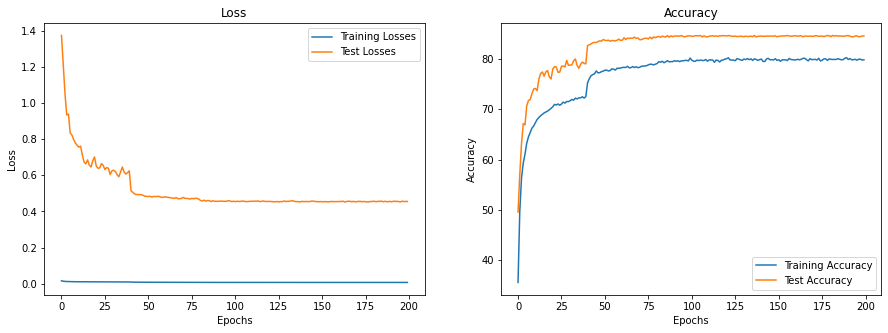

In [29]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(train_losses, label='Training Losses')
axs[0].plot(test_losses, label='Test Losses')
axs[0].legend(loc='upper right')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title("Loss")

axs[1].plot(train_acc, label='Training Accuracy')
axs[1].plot(test_acc, label='Test Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title("Accuracy")

plt.show()

In [30]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
net.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 89 %
Accuracy of   car : 100 %
Accuracy of  bird : 75 %
Accuracy of   cat : 67 %
Accuracy of  deer : 85 %
Accuracy of   dog : 75 %
Accuracy of  frog : 94 %
Accuracy of horse : 92 %
Accuracy of  ship : 90 %
Accuracy of truck : 84 %


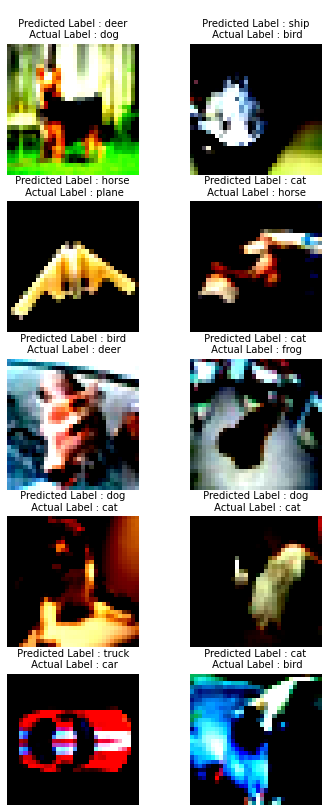

In [38]:
def display_incorrect_pred1(mismatch, n=10 ):
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    display_images = mismatch[:n]
    index = 0
    fig = plt.figure(figsize=(6, 14))
    for img in display_images:
        image = img[0].squeeze().to('cpu').numpy()
        pred = classes[img[1]]
        actual = classes[img[2]]
        ax = fig.add_subplot(5, 2, index+1)
        ax.axis('off')
        ax.set_title(f'\n Predicted Label : {pred} \n Actual Label : {actual}',fontsize=10) 
        #npimg = image.numpy()
        ax.imshow(np.transpose(image, (1, 2, 0)))        
        #ax.imshow(image)
        index = index + 1
    plt.show()

display_incorrect_pred1(wrong_predictions)